In [33]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn.metrics

In [34]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [36]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
88,15768816,Male,26,81000,0


In [37]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [38]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

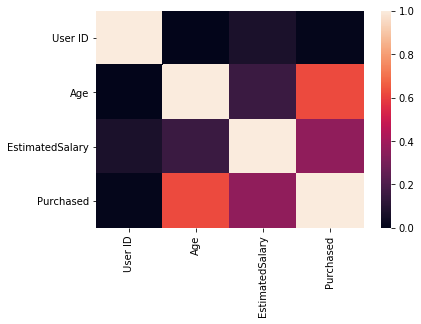

In [39]:
corr=dataset.corr()
sb.heatmap(corr)

In [40]:
dataset.duplicated().sum()

0

In [41]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [42]:
dataset.shape

(400, 5)

In [43]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.20,random_state=0)

In [44]:
train.shape,test.shape

((320, 5), (80, 5))

In [45]:
test.to_csv('test.csv',index=False,encoding='utf-8')

In [46]:
#split the train data into train and cross validation
train_data,cv_data=train_test_split(train,test_size=0.20,random_state=0)

In [47]:
train_data.shape,cv_data.shape

((256, 5), (64, 5))

In [48]:
x_train=train_data.iloc[:,[2,3]].values
y_train=train_data.iloc[:,4].values

In [49]:
x_cv=cv_data.iloc[:,[2,3]].values
y_cv=cv_data.iloc[:,4].values

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [51]:
x_cv=sc.fit_transform(x_cv)

In [52]:
#fitting the RandomForest to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
#predicting the train set result
y_pred=classifier.predict(x_train)
dataset=pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
dataset.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [54]:
#predicting the cross validation result
# x_cv=x_cv.reshape(x_cv(-1,1))
y_predict=classifier.predict(x_cv)
dataset=pd.DataFrame({'Actual':y_cv,'Predicted':y_predict})
dataset.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,0,0


In [55]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred)
cm

array([[161,   0],
       [  2,  93]])

In [56]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_cv,y_predict)
cm1

array([[33,  5],
       [ 6, 20]])

In [57]:
#check accuracy for X train data
Acc_Train=sklearn.metrics.balanced_accuracy_score(y_pred,y_train)*100
print(Acc_Train)

99.38650306748467


In [58]:
#check accuracy for x_cv data
Acc_cv=sklearn.metrics.accuracy_score(y_predict,y_cv)*100
print(Acc_cv)

82.8125


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


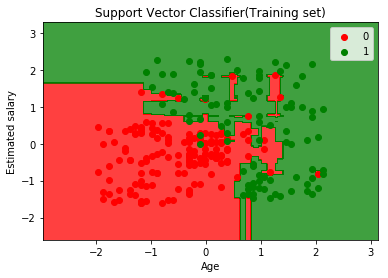

In [59]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Classifier(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


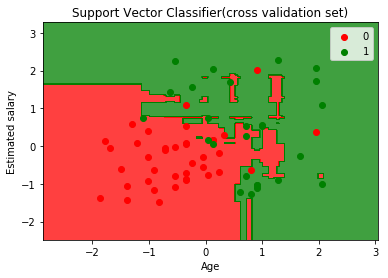

In [60]:
#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_cv,y_cv
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Classifier(cross validation set)')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

In [61]:
#pickle file
import pickle
fileobject=open("Train.pkl","wb")
pickle.dump(classifier,fileobject)
pickle.dump(sc,fileobject)
fileobject.close()